In [1]:
import sys
import os
import numpy as np
sys.path.insert(0, r'D:\uni\Masterarbeit\Code\auswertung')
import auswertung_ma
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from auswertung_ma import f_exp, f_poly, f_poly_long

# Hier erstmal meine neue Version des LP-Alg

In [2]:
p = r'D:\Uni\Masterarbeit\Daten\Tree_billig_mod\bfc'

In [3]:
# c = 2, GVBilligFirstCreator(0, 10, 0, 1)
dic2 = {}

dirs2 = [d for d in os.listdir(p) if 'ModTest_C2' in d]

for ho in dirs2:
    number_nodes = int(ho.split('_')[2])
    print(number_nodes)
    p_konfig = os.path.join(p, ho, os.listdir(os.path.join(p,ho))[0])
    
    df = auswertung_ma.read_tracking_files(p_konfig, read_opt=True, read_lp=True)
    df['anteil_opt'] = df['sum_opt[s]'] / df['total_lp[s]']
    
    # noch einlesen, wie viel % der lp-Variablen ganzzahlig sind
    
    dic2[number_nodes] = df.mean()
    
ns_2 = sorted(list(dic2.keys()))
mean_lp_constrs_2 = [dic2[n].lp_constraint_counter for n in ns_2]
mean_total_lp_2 = np.array([dic2[n]['total_lp[s]'] for n in ns_2])
mean_sum_opt_2 = [dic2[n]['sum_opt[s]'] for n in ns_2]
mean_anteil_opt_2 = [dic2[n]['anteil_opt'] for n in ns_2]
mean_anteil_lp_ganz_2 = [dic2[n]['anteil_lp_int'] for n in ns_2]
print(mean_anteil_lp_ganz_2)

10
160
20
320
40
80
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


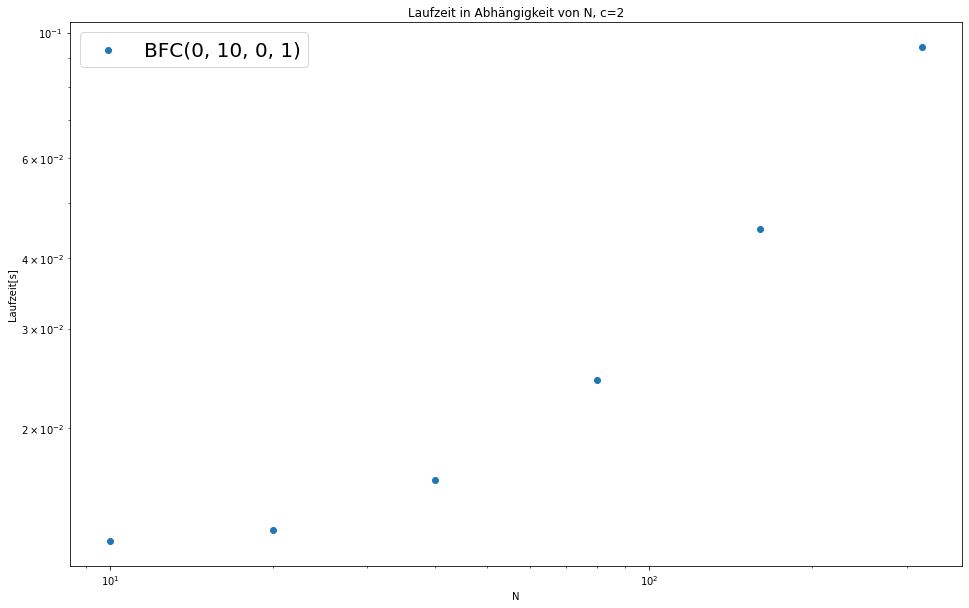

In [4]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Laufzeit in Abhängigkeit von N, c=2')
ax.scatter(ns_2, mean_total_lp_2, label='BFC(0, 10, 0, 1)')

# fitten
popt_exp, pcov_exp = curve_fit(f_exp, ns_2, mean_total_lp_2, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))
# popt_exp
popt_poly, pcov_poly = curve_fit(f_poly, ns_2, mean_total_lp_2, maxfev=50000, p0=[0,1])#, bounds=([-500, 0, -50], [500, 10, 50]))


# ax.plot(np.arange(330), f_exp(np.arange(330), *popt_exp), label=f"{popt_exp[0]:.3} $e^{{N*{popt_exp[1]:.3}}}$")
# ax.plot(np.arange(330), f_poly(np.arange(330), *popt_poly), label=f"{popt_poly[0]:.3} * $N^{{{popt_poly[1]:.3f}}}$")
ax.set_xlabel('N')
ax.set_ylabel('Laufzeit[s]')
ax.legend(fontsize=20)
ax.set_yscale('log')
ax.set_xscale('log')

Das klappt ja wieder noch nicht so richtig. Weder exp, noch poly Fit passe gut

In [5]:
# c = 3, GVBilligFirstCreator(0, 10, 0, 1)
dic3 = {}

dirs3 = [d for d in os.listdir(p) if 'ModTest_C3' in d]

for ho in dirs3:
    number_nodes = int(ho.split('_')[2])
    print(number_nodes)
    p_konfig = os.path.join(p, ho, os.listdir(os.path.join(p,ho))[0])
    
    df = auswertung_ma.read_tracking_files(p_konfig, read_opt=True, read_lp=True)
    df['anteil_opt'] = df['sum_opt[s]'] / df['total_lp[s]']
    
    dic3[number_nodes] = df.mean()
    
ns_3 = sorted(list(dic3.keys()))
mean_lp_constrs_3 = [dic3[n].lp_constraint_counter for n in ns_3]
mean_total_lp_3 = np.array([dic3[n]['total_lp[s]'] for n in ns_3])
mean_sum_opt_3 = [dic3[n]['sum_opt[s]'] for n in ns_3]
mean_anteil_opt_3 = [dic3[n]['anteil_opt'] for n in ns_3]
mean_anteil_lp_ganz_3 = [dic3[n]['anteil_lp_int'] for n in ns_3]
print(mean_anteil_lp_ganz_3)

10
160
20
320
40
80
[0.9964426009720126, 0.9866380625091742, 0.9872686291296001, 0.9876428347687904, 0.9889542056509341, 0.9895401637888771]


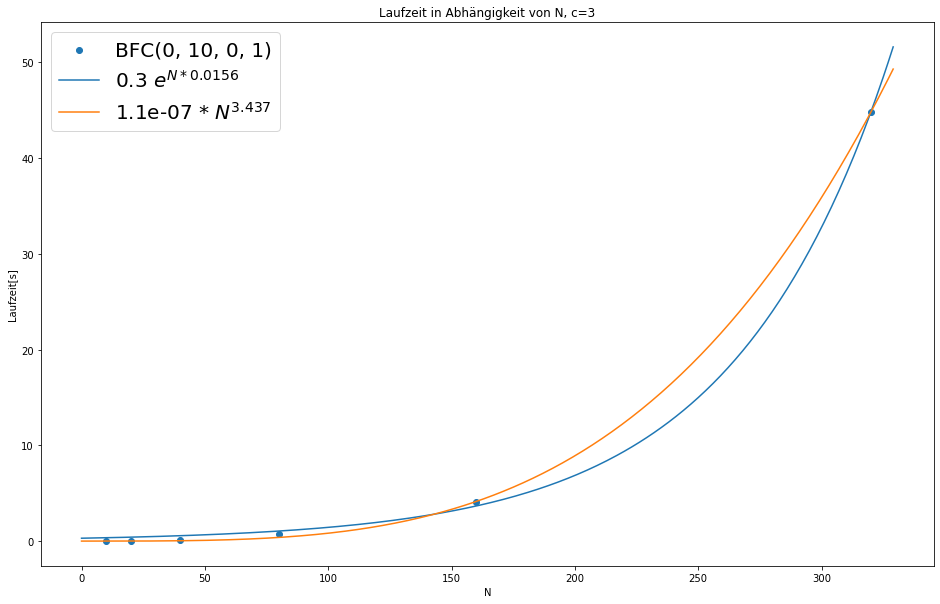

In [6]:
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Laufzeit in Abhängigkeit von N, c=3')
ax.scatter(ns_3, mean_total_lp_3, label='BFC(0, 10, 0, 1)')

# fitten
popt_exp, pcov_exp = curve_fit(f_exp, ns_3, mean_total_lp_3, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))
# popt_exp
popt_poly, pcov_poly = curve_fit(f_poly, ns_3, mean_total_lp_3, maxfev=50000, p0=[0,1])#, bounds=([-500, 0, -50], [500, 10, 50]))


ax.plot(np.arange(330), f_exp(np.arange(330), *popt_exp), label=f"{popt_exp[0]:.3} $e^{{N*{popt_exp[1]:.3}}}$")
ax.plot(np.arange(330), f_poly(np.arange(330), *popt_poly), label=f"{popt_poly[0]:.3} * $N^{{{popt_poly[1]:.3f}}}$")
ax.set_xlabel('N')
ax.set_ylabel('Laufzeit[s]')
ax.legend(fontsize=20)
# ax.set_yscale('log')
# ax.set_xscale('log')

# ax.set_xlim([-10,200])
# ax.set_ylim([-1, 10])

Wieder das bekannte Problem für die Laufzeiten

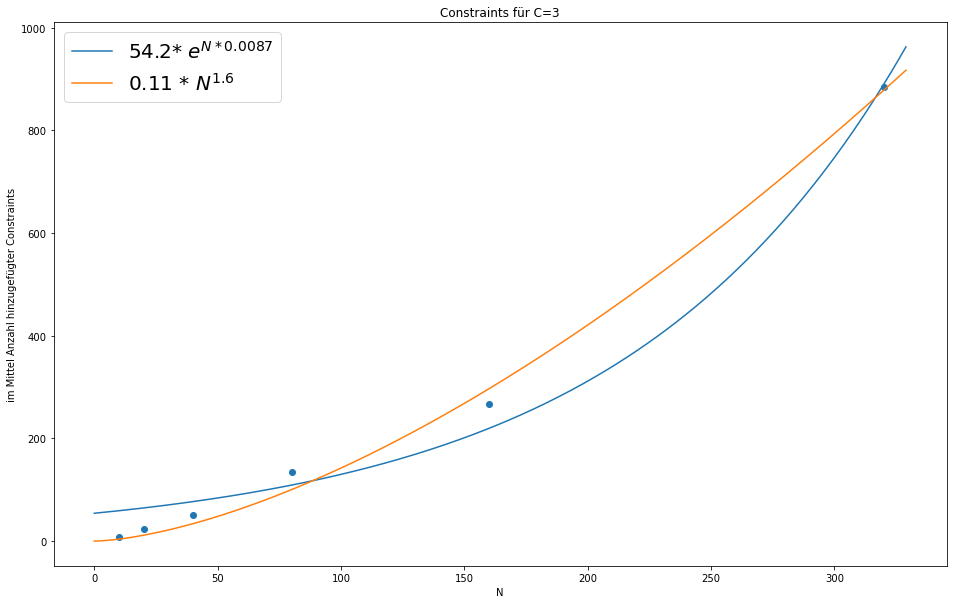

In [7]:
# constraints
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(ns_3, mean_lp_constrs_3)

# fitten
popt_exp, pcov_exp = curve_fit(f_exp, ns_3, mean_lp_constrs_3, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))

popt_poly, pcov_poly = curve_fit(f_poly, ns_3, mean_lp_constrs_3, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))


ax.plot(np.arange(330), f_exp(np.arange(330), *popt_exp), label=f"{popt_exp[0]:.3}* $e^{{N*{popt_exp[1]:.2}}}$")
ax.plot(np.arange(330), f_poly(np.arange(330), *popt_poly), label=f"{popt_poly[0]:.2} * $N^{{{popt_poly[1]:.2}}}$")

ax.set_title('Constraints für C=3')
ax.set_xlabel('N')
ax.set_ylabel('im Mittel Anzahl hinzugefügter Constraints')


ax.legend(fontsize=20)
# ax.set_yscale('log')
# ax.set_xscale('log')

# ax.set_ylim([-2,8000])
# ax.set_xlim([-5, 110])

Die Anzahl constraints wächst jetzt linear?

## c=5

In [8]:
# c = 5, GVBilligFirstCreator(0, 10, 0, 1)
dic5 = {}

dirs5 = [d for d in os.listdir(p) if 'ModTest_C5' in d]

for ho in dirs5:
    number_nodes = int(ho.split('_')[2])
    print(number_nodes)
    p_konfig = os.path.join(p, ho, os.listdir(os.path.join(p,ho))[0])
    
    df = auswertung_ma.read_tracking_files(p_konfig, read_opt=True, read_lp=True)
    df['anteil_opt'] = df['sum_opt[s]'] / df['total_lp[s]']
    
    dic5[number_nodes] = df.mean()
    
ns_5 = sorted(list(dic5.keys()))
mean_lp_constrs_5 = [dic5[n].lp_constraint_counter for n in ns_5]
mean_total_lp_5 = np.array([dic5[n]['total_lp[s]'] for n in ns_5])
mean_sum_opt_5 = [dic5[n]['sum_opt[s]'] for n in ns_5]
mean_anteil_opt_5 = [dic5[n]['anteil_opt'] for n in ns_5]
mean_anteil_lp_ganz_5 = [dic5[n]['anteil_lp_int'] for n in ns_5]
print(mean_anteil_lp_ganz_5)
print(mean_sum_opt_5)
print([mean_sum_opt_5[i] / mean_total_lp_5[i] for i in range(len(ns_5))])

10
160
20
320
40
80
[0.9902411354129458, 0.9884489110278705, 0.9887054350430715, 0.9909147415261752, 0.9908212298431698, 0.9913623866262996]
[0.0026122865499999997, 0.009790208330000001, 0.039874287189999996, 0.16691450195000002, 1.0158340287999998, 23.02186044299999]
[0.1520297115645778, 0.2597032466777659, 0.25377830423317677, 0.191137605836975, 0.15636940278094238, 0.3285857121496921]


In [9]:
dic5

{10: approx_teil[s]            0.000000
 lp_constraint_counter    10.160000
 lp_teil_loop[s]           0.005008
 lp_teil_setup[ms]        11.899351
 sum_opt[s]                0.002612
 anteil_lp_int             0.990241
 total_lp[s]               0.017183
 anteil_opt                0.138699
 dtype: float64,
 160: approx_teil[s]             0.670000
 lp_constraint_counter    328.010000
 lp_teil_loop[s]            6.458024
 lp_teil_setup[ms]         30.315034
 sum_opt[s]                 1.015834
 anteil_lp_int              0.990821
 total_lp[s]                6.496373
 anteil_opt                 0.134563
 dtype: float64,
 20: approx_teil[s]            0.000000
 lp_constraint_counter    26.560000
 lp_teil_loop[s]           0.024047
 lp_teil_setup[ms]        12.948696
 sum_opt[s]                0.009790
 anteil_lp_int             0.988449
 total_lp[s]               0.037698
 anteil_opt                0.247030
 dtype: float64,
 320: approx_teil[s]             5.180000
 lp_constraint_counter

Schaue mir mal nur die Laufzeit an, die insgesamt auf die opt-Schritte fällt

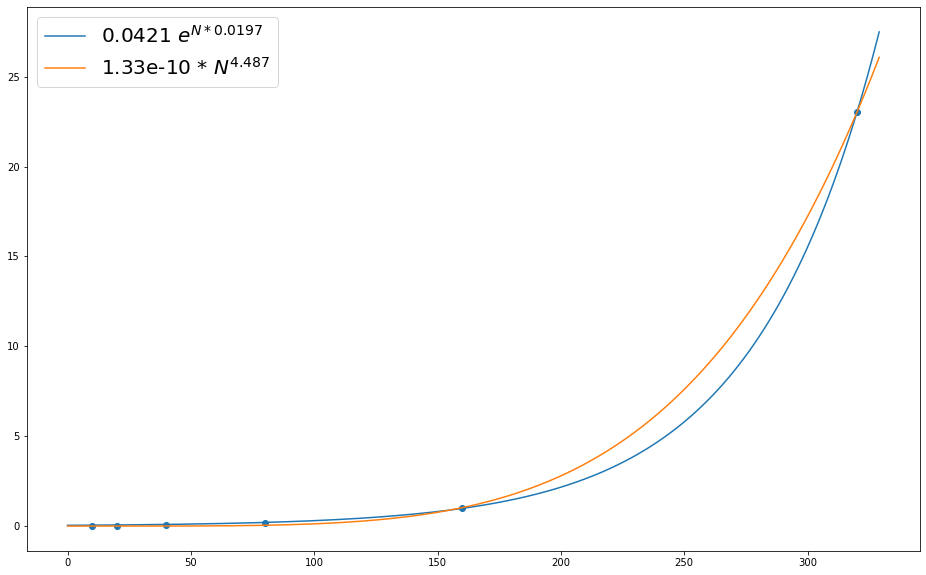

In [10]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(ns_5, mean_sum_opt_5)
# fitten
popt_exp, pcov_exp = curve_fit(f_exp, ns_5, mean_sum_opt_5, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))
# popt_exp
popt_poly, pcov_poly = curve_fit(f_poly, ns_5, mean_sum_opt_5, maxfev=50000, p0=[0,1])#, bounds=([-500, 0, -50], [500, 10, 50]))


ax.plot(np.arange(330), f_exp(np.arange(330), *popt_exp), label=f"{popt_exp[0]:.3} $e^{{N*{popt_exp[1]:.3}}}$")
ax.plot(np.arange(330), f_poly(np.arange(330), *popt_poly), label=f"{popt_poly[0]:.3} * $N^{{{popt_poly[1]:.3f}}}$")
ax.legend(fontsize=20)

Ist das Problem die Gurobi Optimierungszeit? 

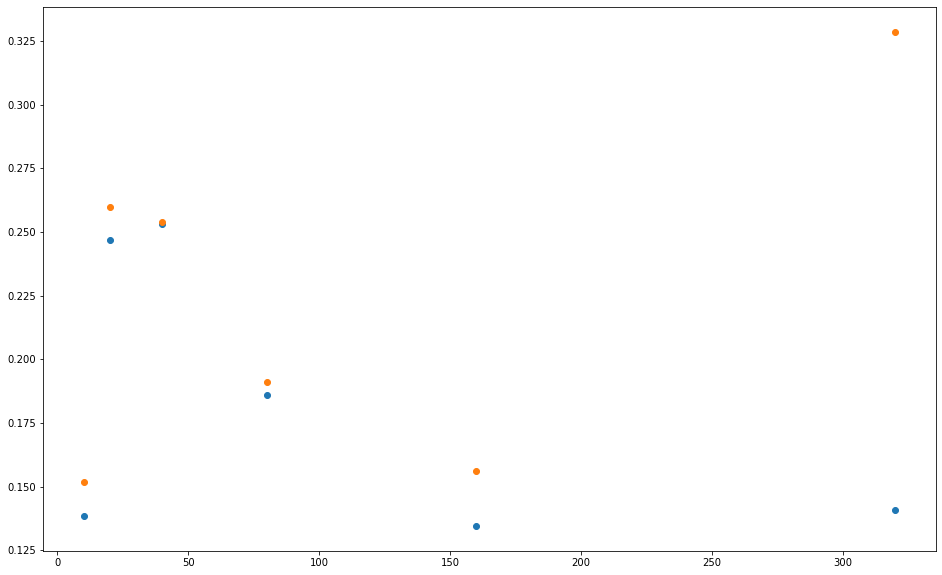

In [11]:
# anteil von opt an Gesamtlaufzeit
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(ns_5, mean_anteil_opt_5, label='mean_anteil_opt')
ax.scatter(ns_5, [mean_sum_opt_5[i] / mean_total_lp_5[i] for i in range(len(ns_5))])

Huh?? Problem, dass ich hier mit mittelwerten rechne?

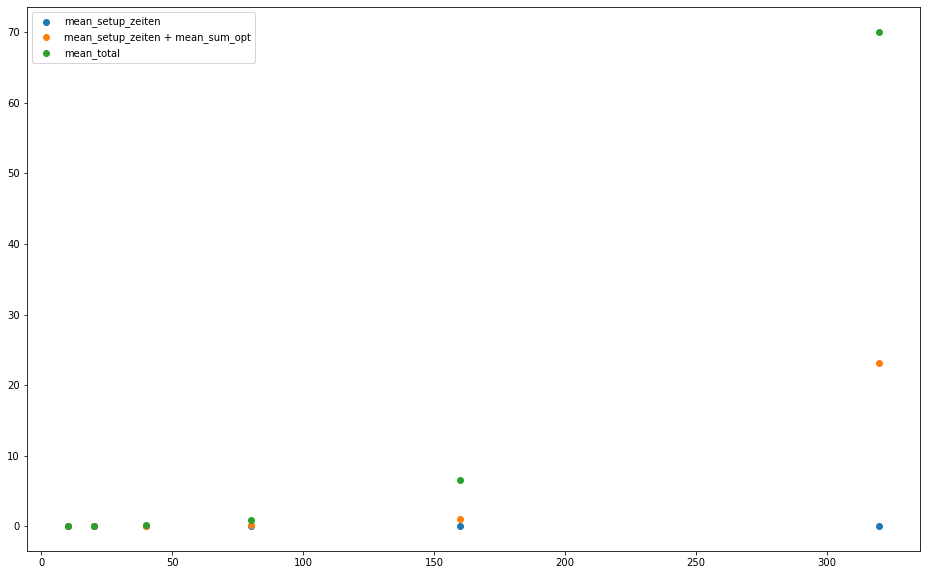

In [12]:
fig, ax = plt.subplots(figsize=(16,10))
mean_setup_zeiten_5 = np.array([dic5[n]['lp_teil_setup[ms]']/1000 for n in ns_5])
mean_approx_zeiten_5 = np.array([dic5[n]['approx_teil[s]'] for n in ns_5])
ax.scatter(ns_5, mean_setup_zeiten_5, label='mean_setup_zeiten')
ax.scatter(ns_5, mean_setup_zeiten_5 + np.array(mean_sum_opt_5), label='mean_setup_zeiten + mean_sum_opt')
# ax.scatter(ns_5, mean_setup_zeiten_5 + np.array(mean_sum_opt_5) + mean_approx_zeiten_5, label='mean_setup_zeiten + mean_sum_opt + mean_approx')

ax.scatter(ns_5, mean_total_lp_5, label='mean_total')
ax.legend()

# Auswertung
Der hauptteil des LP-Approx-Algs, liegt beim Bauen von neuen Constraints?

In [21]:
# schaue mir setupzeiten an
[dic5[n]['lp_teil_setup[ms]']/1000 for n in ns_5]

[0.011899351000000006,
 0.012948695999999992,
 0.015510295999999998,
 0.020286875,
 0.030315034000000005,
 0.052129410999999994]

Die werden fuer mehr Kanten schon größer, aber haben trotzdem kaum Einfluss auf die Gesamtlaufzeit:

In [23]:
# loop zeiten
print([dic5[n]['lp_teil_loop[s]'] for n in ns_5])

[0.005007937329999998, 0.02404741929999998, 0.13729421600000002, 0.84675875, 6.458024000000006, 70.00148700000001]


In [25]:
print(list(mean_total_lp_5))

[0.017182737000000003, 0.037697674, 0.15712252199999993, 0.8732687700000001, 6.496373399999998, 70.06348600000003]


Wie man sieht, fällt der Hauptteil der LP-Laufzeit noch auf das while-loop

In [29]:
# misch fkt zum fitten
def f_misch(n, a, b, c, d):
    return c * (n ** b) * np.exp(a * (n ** d))

[3.73634975e+00 1.47795122e-04 1.62483203e-05 2.44122759e-01]


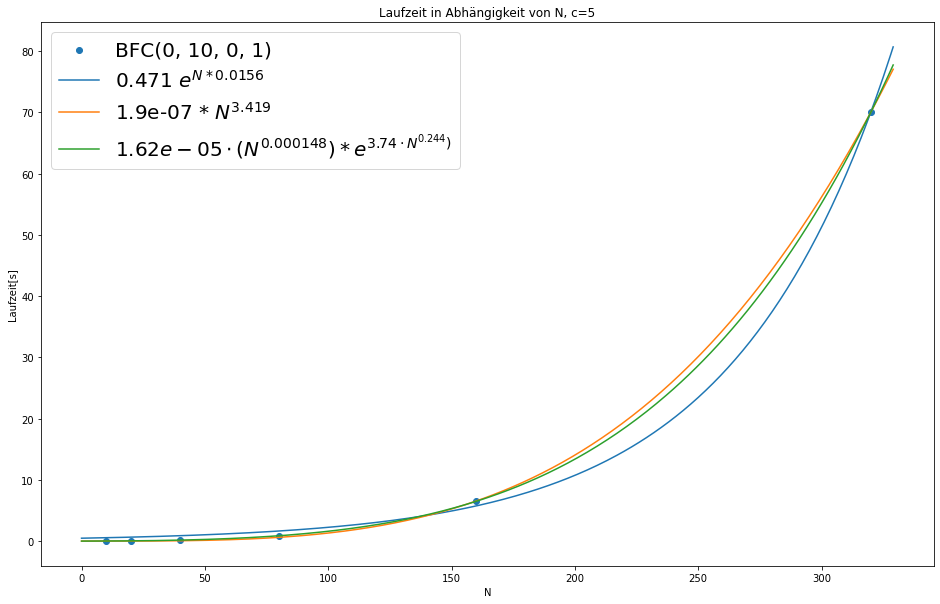

In [46]:
# laufzeit
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Laufzeit in Abhängigkeit von N, c=5')
ax.scatter(ns_5, mean_total_lp_5, label='BFC(0, 10, 0, 1)')

# fitten
popt_exp, pcov_exp = curve_fit(f_exp, ns_5, mean_total_lp_5, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))
# popt_exp
popt_poly, pcov_poly = curve_fit(f_poly, ns_5, mean_total_lp_5, maxfev=50000, p0=[0,1])#, bounds=([-500, 0, -50], [500, 10, 50]))

popt_misch, pcov_misch = curve_fit(f_misch, ns_5, mean_total_lp_5, maxfev=50000, p0=[0,0,0,1])
print(popt_misch)
ax.plot(np.arange(330), f_exp(np.arange(330), *popt_exp), label=f"{popt_exp[0]:.3} $e^{{N*{popt_exp[1]:.3}}}$")
ax.plot(np.arange(330), f_poly(np.arange(330), *popt_poly), label=f"{popt_poly[0]:.3} * $N^{{{popt_poly[1]:.3f}}}$")
ax.plot(np.arange(330), f_misch(np.arange(330), *popt_misch), label=f"${popt_misch[2]:.3} \cdot (N^{{{popt_misch[1]:.3}}}) * e^{{{popt_misch[0]:.3} \cdot N^{{{popt_misch[3]:.3}}})}}$")
ax.set_xlabel('N')
ax.set_ylabel('Laufzeit[s]')
ax.legend(fontsize=20)
# ax.set_yscale('log')
# ax.set_xscale('log')

# ax.set_xlim([-10,200])
# ax.set_ylim([-1, 10])

vergleiche $N^b$ und $e^{a N^d}$

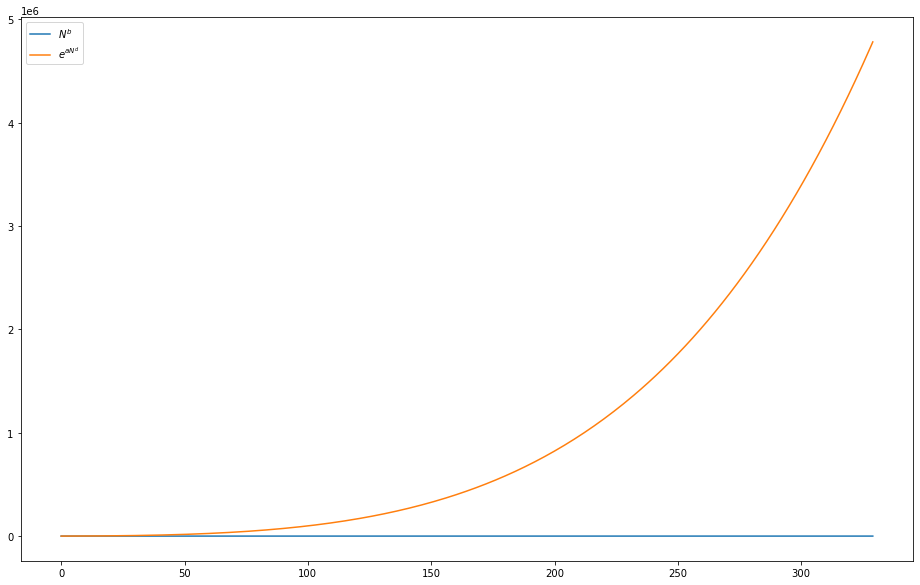

In [37]:
fig, ax = plt.subplots(figsize=(16,10))
ns = np.arange(330)
pol = ns ** popt_misch[1]
exp = np.exp(popt_misch[0] * ns ** popt_misch[3]) 
ax.plot(ns, pol, label='$N^b$')
ax.plot(ns, exp, label='$e^{a N ^d}$')
ax.legend()

Der exponentielle Anteil ist größer, oder?

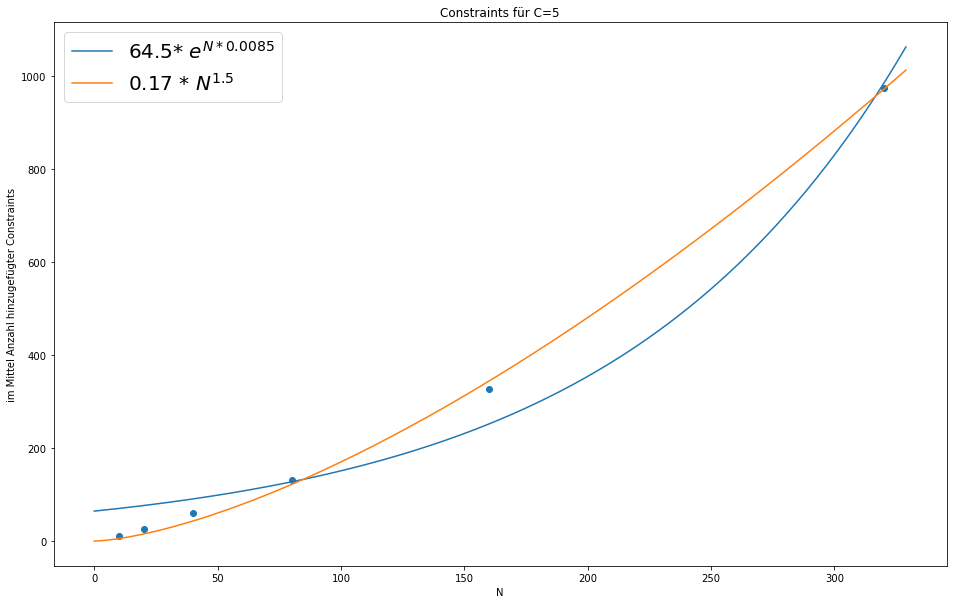

In [16]:
# constraints
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(ns_5, mean_lp_constrs_5)

# fitten
popt_exp, pcov_exp = curve_fit(f_exp, ns_5, mean_lp_constrs_5, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))

popt_poly, pcov_poly = curve_fit(f_poly, ns_5, mean_lp_constrs_5, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))


ax.plot(np.arange(330), f_exp(np.arange(330), *popt_exp), label=f"{popt_exp[0]:.3}* $e^{{N*{popt_exp[1]:.2}}}$")
ax.plot(np.arange(330), f_poly(np.arange(330), *popt_poly), label=f"{popt_poly[0]:.2} * $N^{{{popt_poly[1]:.2}}}$")

ax.set_title('Constraints für C=5')
ax.set_xlabel('N')
ax.set_ylabel('im Mittel Anzahl hinzugefügter Constraints')


ax.legend(fontsize=20)
# ax.set_yscale('log')
# ax.set_xscale('log')

# ax.set_ylim([-2,8000])
# ax.set_xlim([-5, 110])

# Jetzt nicht mehr den bfc, sondern den rtc:

In [13]:
p = r'D:\Uni\Masterarbeit\Daten\Tree_billig_mod\rtc'
# c = 2, RTC(0, 10)
dic2_rtc = {}

dirs2 = [d for d in os.listdir(p) if 'ModTest_C2' in d]

for ho in dirs2:
    number_nodes = int(ho.split('_')[2])
    print(number_nodes)
    p_konfig = os.path.join(p, ho, os.listdir(os.path.join(p,ho))[0])
    
    df = auswertung_ma.read_tracking_files(p_konfig, read_opt=True, b_read_lp_results=True)
    df['anteil_opt'] = df['sum_opt[s]'] / df['total_lp[s]']
    
    # noch einlesen, wie viel % der lp-Variablen ganzzahlig sind
    
    dic2_rtc[number_nodes] = df.mean()
    
ns_2_rtc = sorted(list(dic2_rtc.keys()))
mean_lp_constrs_2_rtc = [dic2_rtc[n].lp_constraint_counter for n in ns_2_rtc]
mean_total_lp_2_rtc = np.array([dic2_rtc[n]['total_lp[s]'] for n in ns_2_rtc])
mean_sum_opt_2_rtc = [dic2_rtc[n]['sum_opt[s]'] for n in ns_2_rtc]
mean_anteil_opt_2_rtc = [dic2_rtc[n]['anteil_opt'] for n in ns_2_rtc]
mean_anteil_lp_ganz_2_rtc = [dic2_rtc[n]['anteil_lp_int'] for n in ns_2_rtc]
print(mean_anteil_lp_ganz_2_rtc)

10


TypeError: read_tracking_files() got an unexpected keyword argument 'b_read_lp_results'

Schon mal gut zu wissen, für einen Tree, ist auch im rtc Fall die Lösung immer ganzzahlig. Und: Mit meinen constraints, brauche ich hier auch immer nur einen Opt-Schritt!

In [59]:
p = r'D:\Uni\Masterarbeit\Daten\Tree_billig_mod\rtc'
# c = 3, rtc(0, 10)
dic3_rtc = {}

dirs3 = [d for d in os.listdir(p) if 'ModTest_C3' in d]

for ho in dirs3:
    number_nodes = int(ho.split('_')[2])
    print(number_nodes)
    p_konfig = os.path.join(p, ho, os.listdir(os.path.join(p,ho))[0])
    
    df = auswertung_ma.read_tracking_files(p_konfig, read_opt=True, b_read_lp_results=True)
    df['anteil_opt'] = df['sum_opt[s]'] / df['total_lp[s]']
    
    # noch einlesen, wie viel % der lp-Variablen ganzzahlig sind
    
    dic3_rtc[number_nodes] = df.mean()
    
ns_3_rtc = sorted(list(dic3_rtc.keys()))
mean_lp_constrs_3_rtc = [dic3_rtc[n].lp_constraint_counter for n in ns_3_rtc]
mean_total_lp_3_rtc = np.array([dic3_rtc[n]['total_lp[s]'] for n in ns_3_rtc])
mean_sum_opt_3_rtc = [dic3_rtc[n]['sum_opt[s]'] for n in ns_3_rtc]
mean_anteil_opt_3_rtc = [dic3_rtc[n]['anteil_opt'] for n in ns_3_rtc]
mean_anteil_lp_ganz_3_rtc = [dic3_rtc[n]['anteil_lp_int'] for n in ns_3_rtc]
print(mean_anteil_lp_ganz_3_rtc)

10
160
20
320
40
80
[0.9635510216907274, 0.9419352965206206, 0.9315892800729969, 0.9368207435197229, 0.9442891624517568, 0.9463068461836056]


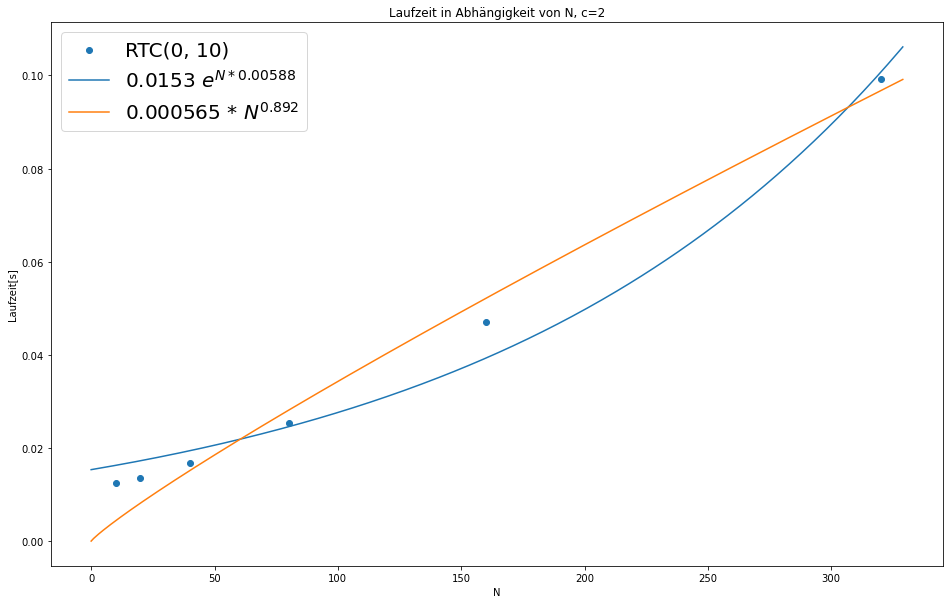

In [58]:
# laufzeit
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Laufzeit in Abhängigkeit von N, c=2')
ax.scatter(ns_2_rtc, mean_total_lp_2_rtc, label='RTC(0, 10)')

# fitten
popt_exp, pcov_exp = curve_fit(f_exp, ns_2_rtc, mean_total_lp_2_rtc, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))
# popt_exp
popt_poly, pcov_poly = curve_fit(f_poly, ns_2_rtc, mean_total_lp_2_rtc, maxfev=50000, p0=[0,1])#, bounds=([-500, 0, -50], [500, 10, 50]))

ax.plot(np.arange(330), f_exp(np.arange(330), *popt_exp), label=f"{popt_exp[0]:.3} $e^{{N*{popt_exp[1]:.3}}}$")
ax.plot(np.arange(330), f_poly(np.arange(330), *popt_poly), label=f"{popt_poly[0]:.3} * $N^{{{popt_poly[1]:.3f}}}$")
ax.set_xlabel('N')
ax.set_ylabel('Laufzeit[s]')
ax.legend(fontsize=20)
# ax.set_yscale('log')
# ax.set_xscale('log')

# ax.set_xlim([-10,200])
# ax.set_ylim([-1, 10])

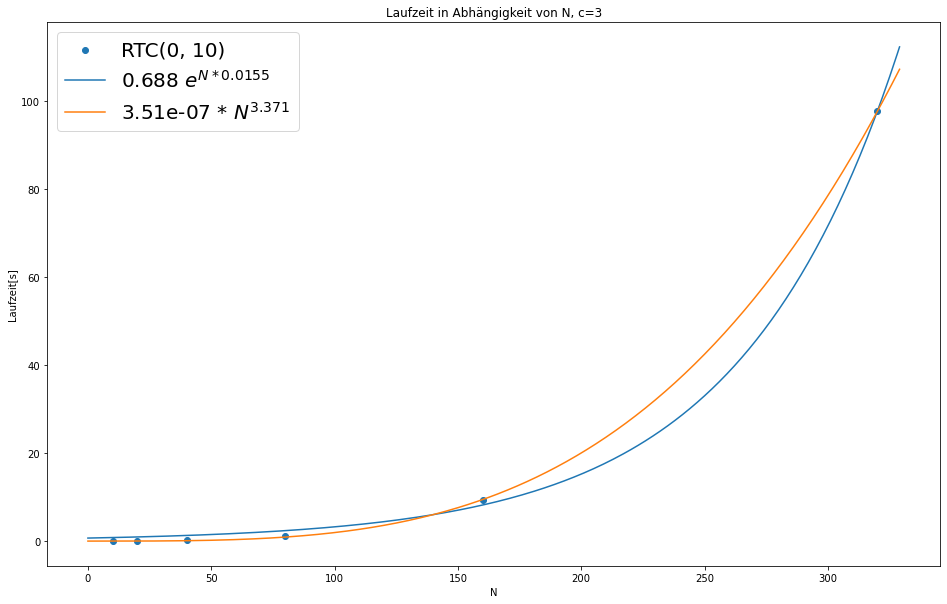

In [60]:
# laufzeit
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title('Laufzeit in Abhängigkeit von N, c=3')
ax.scatter(ns_3_rtc, mean_total_lp_3_rtc, label='RTC(0, 10)')

# fitten
popt_exp, pcov_exp = curve_fit(f_exp, ns_3_rtc, mean_total_lp_3_rtc, maxfev=50000, p0=[0,0])#, bounds=([-500, 0, -50], [500, 10, 50]))
# popt_exp
popt_poly, pcov_poly = curve_fit(f_poly, ns_3_rtc, mean_total_lp_3_rtc, maxfev=50000, p0=[0,1])#, bounds=([-500, 0, -50], [500, 10, 50]))

ax.plot(np.arange(330), f_exp(np.arange(330), *popt_exp), label=f"{popt_exp[0]:.3} $e^{{N*{popt_exp[1]:.3}}}$")
ax.plot(np.arange(330), f_poly(np.arange(330), *popt_poly), label=f"{popt_poly[0]:.3} * $N^{{{popt_poly[1]:.3f}}}$")
ax.set_xlabel('N')
ax.set_ylabel('Laufzeit[s]')
ax.legend(fontsize=20)
# ax.set_yscale('log')
# ax.set_xscale('log')

# ax.set_xlim([-10,200])
# ax.set_ylim([-1, 10])

# ich will checken, ob die Summe der Einzelteile des Alg. mit der Gesamtzeit übereinstimmen

In [4]:
p77 = r'D:\Uni\Masterarbeit\Daten\Tree_billig_mod\ModTest_C3_77_nodes_5_scenarios\TreePlusC_3.000000_c_77_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000'

In [5]:
df77 = auswertung_ma.read_tracking_files(p77, read_opt=True, read_lp=True, read_constr=True)
df77['anteil_opt'] = df77['sum_opt[s]'] / df77['total_lp[s]']

In [11]:
(df77['total_lp[s]'] - (df77['sum_opt[s]'] + df77['sum_add_constr[s]'] + df77['lp_teil_setup[ms]']/1000)).max()

0.052807622

Auswertung: Das passt so :) es gibt immer nur einen kleinen overhead von maximal 0.05s

Jetzt will ich wissen, wie die Einzelteile skalieren

In [30]:
pt = r'D:\Uni\Masterarbeit\Daten\Tree_billig_mod\rtc\ModTest_C5_320_nodes_5_scenarios\TreePlusC_5.000000_c_320_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000'
dft = auswertung_ma.read_tracking_files(pt, read_opt=True, read_lp=True)
# dft

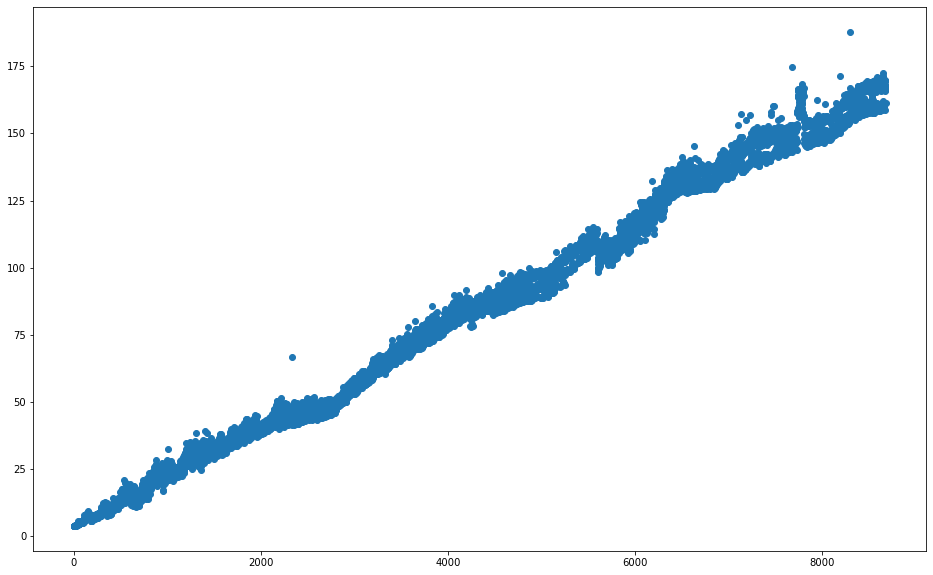

In [53]:
opt0 = np.loadtxt(os.path.join(pt, 'simulation_0', 'Tracking', 'opt', '46_ms.txt'))
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(np.arange(len(opt0[1:])), opt0[1:])
# ax.set_yscale('log')
# ax.set_xscale('log')

In [3]:
p = r'D:\Uni\Masterarbeit\Daten\Tree_billig_mod\rtc'
# c = 5, rtc(0, 10)
dic5_rtc = {}

dirs5 = [d for d in os.listdir(p) if 'ModTest_C5' in d]

for ho in dirs5:
    number_nodes = int(ho.split('_')[2])
    print(number_nodes)
    p_konfig = os.path.join(p, ho, os.listdir(os.path.join(p,ho))[0])
    
    df = auswertung_ma.read_tracking_files(p_konfig, read_opt=True, read_lp=True)
    df['anteil_opt'] = df['sum_opt[s]'] / df['total_lp[s]']
    df['anteil_loop'] = df['lp_teil_loop[s]'] / df['total_lp[s]']
    df['anteil_opt_an_loop'] = df['sum_opt[s]'] / df['lp_teil_loop[s]']
    # noch einlesen, wie viel % der lp-Variablen ganzzahlig sind
    
    dic5_rtc[number_nodes] = df.mean()
    
ns_5_rtc = sorted(list(dic5_rtc.keys()))
mean_lp_constrs_5_rtc = [dic5_rtc[n].lp_constraint_counter for n in ns_5_rtc]
mean_total_lp_5_rtc = np.array([dic5_rtc[n]['total_lp[s]'] for n in ns_5_rtc])
mean_sum_opt_5_rtc = [dic5_rtc[n]['sum_opt[s]'] for n in ns_5_rtc]
mean_anteil_opt_5_rtc = [dic5_rtc[n]['anteil_opt'] for n in ns_5_rtc]
mean_anteil_lp_ganz_5_rtc = [dic5_rtc[n]['anteil_lp_int'] for n in ns_5_rtc]
mean_anteil_loop_5_rtc = [dic5_rtc[n]['anteil_loop'] for n in ns_5_rtc]
mean_anteil_opt_an_loop_5_rtc = [[dic5_rtc[n]['anteil_opt_an_loop'] for n in ns_5_rtc]]

10
160
20
320
40
80


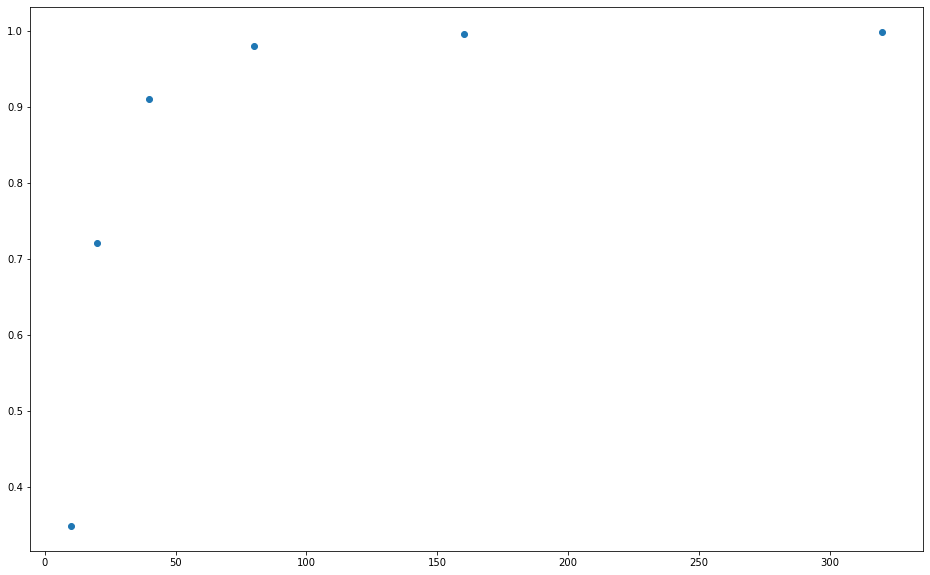

In [4]:
# welchen Anteil an der Gesamtlaufzeit, macht im Mittel die Summer der opt-Werte aus
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(ns_5_rtc, mean_anteil_loop_5_rtc)

das while-loop ist fuer grosse N komplett fuer die Laufzeit verantwortlich

[6.69905943e-10 4.36855109e+00 5.13346446e-02]


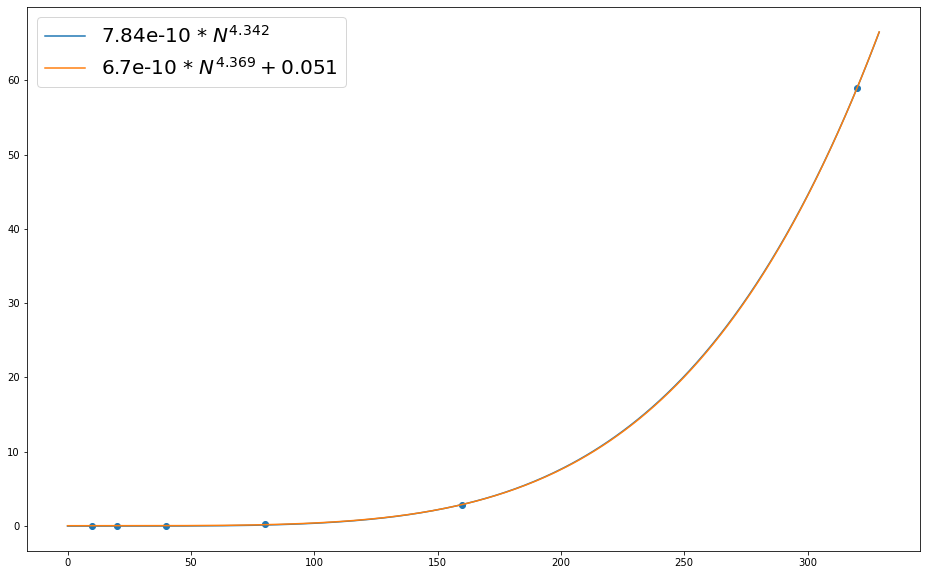

In [7]:
# wie skalieren die opt-summen-Werte
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(ns_5_rtc, mean_sum_opt_5_rtc)
popt_poly, pcov_poly = curve_fit(f_poly, ns_5_rtc, mean_sum_opt_5_rtc, maxfev=50000, p0=[0,1])#, bounds=([-500, 0, -50], [500, 10, 50]))
popt_polyl, pcov_polyl = curve_fit(f_poly_long, ns_5_rtc, mean_sum_opt_5_rtc, maxfev=50000, p0=[0,1,1])#, bounds=([-500, 0, -50], [500, 10, 50]))

ax.plot(np.arange(330), f_poly(np.arange(330), *popt_poly), label=f"{popt_poly[0]:.3} * $N^{{{popt_poly[1]:.3f}}}$")
ax.plot(np.arange(330), f_poly_long(np.arange(330), *popt_polyl), label=f"{popt_polyl[0]:.3} * $N^{{{popt_polyl[1]:.3f}}}+${popt_polyl[2]:.3f}")
print(popt_polyl)
ax.legend(fontsize=20)

Die opt-Summen skaliert selbst auch schon so komisch, obwohl sie nicht den Hauptteil an der Simulation ausmachen

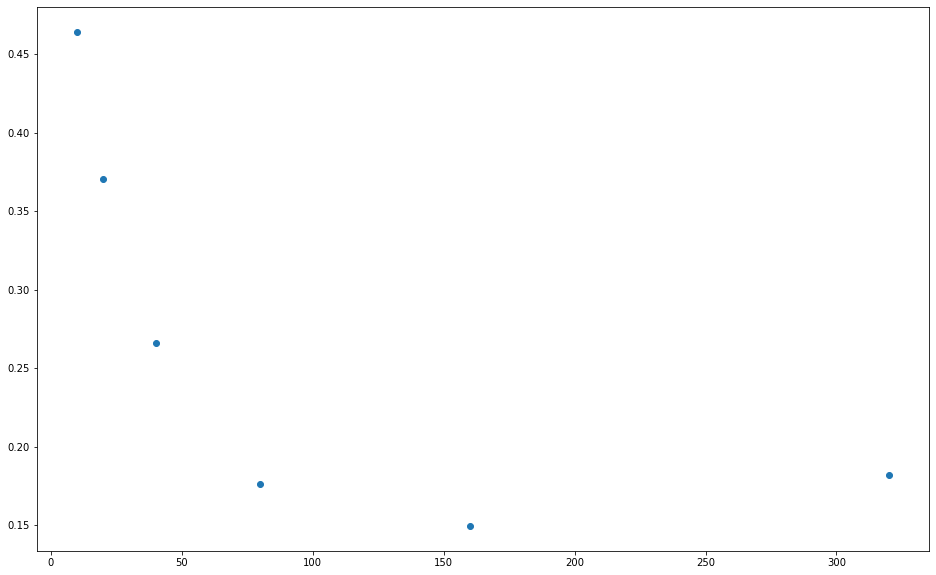

In [63]:
# welchen Anteil an der Gesamtlaufzeit, macht im Mittel die Summer der opt-Werte aus
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(ns_5_rtc, mean_anteil_opt_an_loop_5_rtc)

Der Gurobi-Anteil (opt) ist nicht fuer die Hauptlaufzeit im while-loop verantwortlich. Koennte aber sein, dass sich das fuer grosse N noch aendert

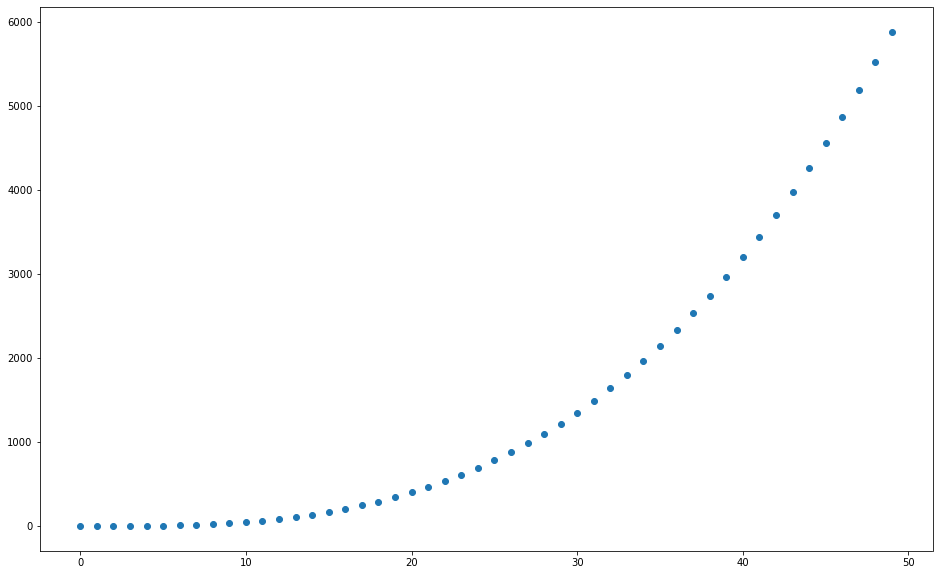

In [81]:
xs = np.arange(0, 50)
ypar = 0.05 * (xs ** 3 + 6*np.random.random() - 6*np.random.random())
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(xs, ypar)

# Schauen, ob das break statement den Alg. verlangsamt hat

In [9]:
p_track = r'D:\Uni\Masterarbeit\Daten\Track'

In [23]:
# c = 3, rtc(0, 10)
dic3_track = {}

dirs3t = [d for d in os.listdir(p_track) if 'Track_C3' in d]

for ho in dirs3t:
    number_nodes = int(ho.split('_')[2])
    print(number_nodes)
    p_konfig = os.path.join(p_track, ho, os.listdir(os.path.join(p_track,ho))[0])
    
    df = auswertung_ma.read_tracking_files(p_konfig, read_opt=True, read_lp=True, read_constr=True)
    df['anteil_opt'] = df['sum_opt[s]'] / df['total_lp[s]']
    df['anteil_loop'] = df['lp_teil_loop[s]'] / df['total_lp[s]']
    df['anteil_opt_an_loop'] = df['sum_opt[s]'] / df['lp_teil_loop[s]']
    
    dic3_track[number_nodes] = df.mean()
    
ns_3t = sorted(list(dic3_track.keys()))
mean_lp_constrs_3t = [dic3_track[n].lp_constraint_counter for n in ns_3t]
mean_total_lp_3t = np.array([dic3_track[n]['total_lp[s]'] for n in ns_3t])
mean_sum_opt_3t = [dic3_track[n]['sum_opt[s]'] for n in ns_3t]
mean_anteil_opt_3t = [dic3_track[n]['anteil_opt'] for n in ns_3t]
mean_anteil_lp_ganz_3t = [dic3_track[n]['anteil_lp_int'] for n in ns_3t]
mean_anteil_loop_3t = [dic3_track[n]['anteil_loop'] for n in ns_3t]
mean_anteil_opt_an_loop_3t = [[dic3_track[n]['anteil_opt_an_loop'] for n in ns_3t]]
mean_sum_constr_3t = [[dic3_track[n]['sum_add_constr[s]'] for n in ns_3t]]
mean_teil_loop_3t = [[dic3_track[n]['lp_teil_loop[s]'] for n in ns_3t]]

10
160
20
320
40
80


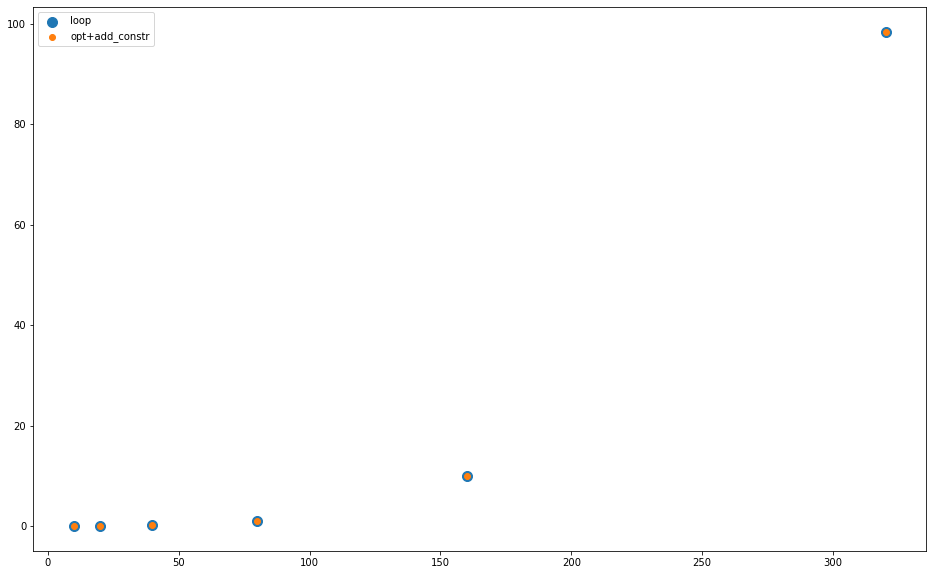

In [29]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(ns_3t, mean_teil_loop_3t, label='loop', s=100)
ax.scatter(ns_3t, np.array(mean_sum_opt_3t) + np.array(mean_sum_constr_3t), label='opt+add_constr')
ax.legend()
# ax.set_xlim([-2,100])
# ax.set_ylim([-2,10])

Rest + opt = loop Zeit. Das ist gut, weil das muss auch so sein

# war der alg. ohne das break statement schneller?
# erst anzahl an while-loop Iterationen


In [62]:
# c = 3, rtc(0, 10), ohne break
dic3_track_wob = {}

dirs3t_wob = [d for d in os.listdir(p_track) if 'Track_woB_C3' in d]

for ho in dirs3t_wob:
    number_nodes = int(ho.split('_')[3])
    print(number_nodes)
    p_konfig = os.path.join(p_track, ho, os.listdir(os.path.join(p_track,ho))[0])
    
    df = auswertung_ma.read_tracking_files(p_konfig, read_opt=True, read_lp=True, read_constr=True)
    df['anteil_opt'] = df['sum_opt[s]'] / df['total_lp[s]']
    df['anteil_loop'] = df['lp_teil_loop[s]'] / df['total_lp[s]']
    df['anteil_opt_an_loop'] = df['sum_opt[s]'] / df['lp_teil_loop[s]']
    
    dic3_track_wob[number_nodes] = df.mean()
    
ns_3t_wob = sorted(list(dic3_track_wob.keys()))

# brauche die constr, die jetzt aber nicht mehr der constr anzahl entsprechen, sondern der Anzahl Iterationen
mean_lp_constrs_3t_wob = [dic3_track_wob[n].lp_constraint_counter for n in ns_3t_wob]
mean_total_lp_3t_wob = np.array([dic3_track_wob[n]['total_lp[s]'] for n in ns_3t_wob])
mean_sum_constr_3t_wob = [[dic3_track_wob[n]['sum_add_constr[s]'] for n in ns_3t_wob]]

# mean_sum_opt_3t = [dic3_track[n]['sum_opt[s]'] for n in ns_3t]
# mean_anteil_opt_3t = [dic3_track[n]['anteil_opt'] for n in ns_3t]
# mean_anteil_lp_ganz_3t = [dic3_track[n]['anteil_lp_int'] for n in ns_3t]
# mean_anteil_loop_3t = [dic3_track[n]['anteil_loop'] for n in ns_3t]
# mean_anteil_opt_an_loop_3t = [[dic3_track[n]['anteil_opt_an_loop'] for n in ns_3t]]
# mean_sum_constr_3t = [[dic3_track[n]['sum_add_constr[s]'] for n in ns_3t]]
# mean_teil_loop_3t = [[dic3_track[n]['lp_teil_loop[s]'] for n in ns_3t]]

10
160
20
320
40
80


Text(0.5, 1.0, 'Anzahl an Loop-Iterationen')

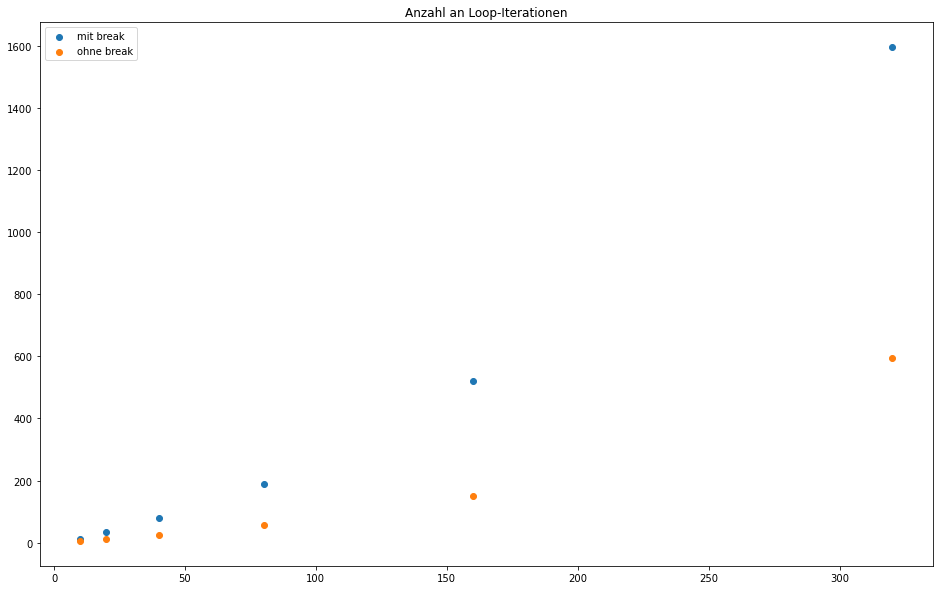

In [34]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(ns_3t, mean_lp_constrs_3t, label='mit break')
ax.scatter(ns_3t, mean_lp_constrs_3t_wob, label='ohne break')
ax.legend()
ax.set_title('Anzahl an Loop-Iterationen')
# ax.set_xlim([-2,100])
# ax.set_ylim([-2,10])

In [38]:
print(np.array(mean_lp_constrs_3t_wob)/np.array(mean_lp_constrs_3t))

[0.46886121 0.31323529 0.29844961 0.29532808 0.29070417 0.37293806]


Also bei 320 Knoten, wird der Anteil auf einmal wieder deutlich groesser, das muss ich noch genauer anschauen.
Das ist ordentlich, aber wie wirkt sich das auf die Laufzeit aus?

Text(0.5, 1.0, 'Gesamtlaufzeit in s')

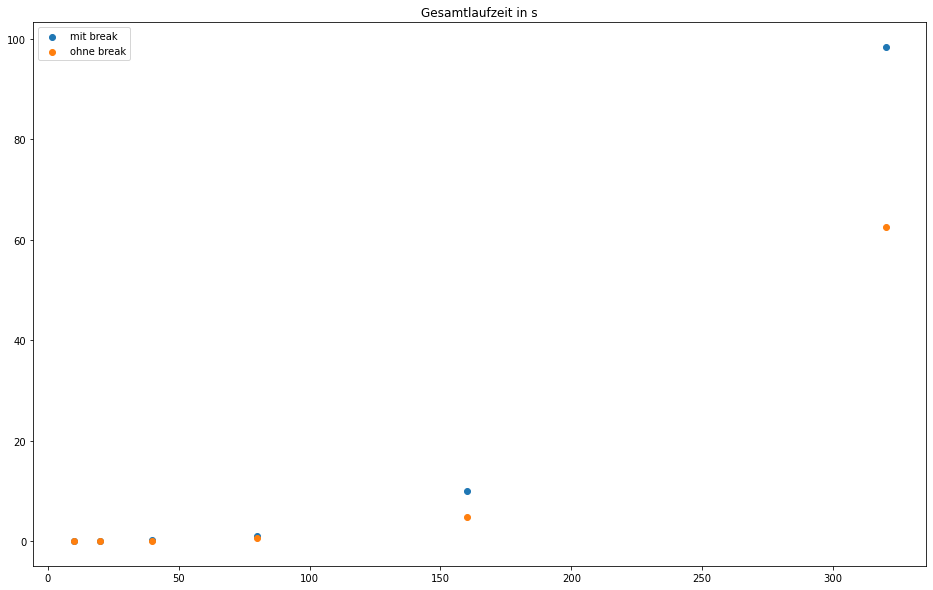

In [35]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(ns_3t, mean_total_lp_3t, label='mit break')
ax.scatter(ns_3t, mean_total_lp_3t_wob, label='ohne break')
ax.legend()
ax.set_title('Gesamtlaufzeit in s')
# ax.set_xlim([-2,100])
# ax.set_ylim([-2,10])

In [39]:
print(np.array(mean_total_lp_3t_wob)/np.array(mean_total_lp_3t))

[0.90585901 0.63938377 0.53759165 0.50931124 0.47587917 0.63496209]


Die Laufzeit sinkt nicht im selben Stil, wie die Anzahl an loop-Iterationen
Das sieht sehr vielversprechend aus

Das selbe nochmal, aber 100 andere runs

In [78]:
# c = 3, rtc(0, 10), ohne break
dic3_track_wob2 = {}

dirs3t_wob2 = [d for d in os.listdir(p_track) if 'Track_woB2_C3' in d]

for ho in dirs3t_wob2:
    number_nodes = int(ho.split('_')[3])
    print(number_nodes)
    p_konfig = os.path.join(p_track, ho, os.listdir(os.path.join(p_track,ho))[0])
    
    df = auswertung_ma.read_tracking_files(p_konfig, read_opt=True, read_lp=True, read_constr=True)
    df['anteil_opt'] = df['sum_opt[s]'] / df['total_lp[s]']
    df['anteil_loop'] = df['lp_teil_loop[s]'] / df['total_lp[s]']
    df['anteil_opt_an_loop'] = df['sum_opt[s]'] / df['lp_teil_loop[s]']
    
    dic3_track_wob2[number_nodes] = df.mean()
    
ns_3t_wob2 = sorted(list(dic3_track_wob2.keys()))

# brauche die constr, die jetzt aber nicht mehr der constr anzahl entsprechen, sondern der Anzahl Iterationen
mean_lp_constrs_3t_wob2 = [dic3_track_wob2[n].lp_constraint_counter for n in ns_3t_wob2]
mean_total_lp_3t_wob2 = np.array([dic3_track_wob2[n]['total_lp[s]'] for n in ns_3t_wob2])
mean_sum_constr_3t_wob2 = [[dic3_track_wob2[n]['sum_add_constr[s]'] for n in ns_3t_wob2]]
mean_teil_loop_3t_wob2 = [[dic3_track_wob2[n]['lp_teil_loop[s]'] for n in ns_3t_wob2]]
mean_sum_opt_3t_wob2 = [dic3_track_wob2[n]['sum_opt[s]'] for n in ns_3t_wob2]

10
160
20
320
40
640
80


In [56]:
print(np.array(mean_total_lp_3t_wob2)/np.array(mean_total_lp_3t))

[0.92185603 0.65637741 0.51359635 0.4587907  0.48634783 0.55945702]


Da gibts also anscheinend schon Variationen, aber es ist hinten raus doch wieder etwas mehr geworden

# Wie skaliert denn jetzt aber die Varainte ohne break?

[6.69905943e-10 4.36855109e+00 5.13346446e-02]


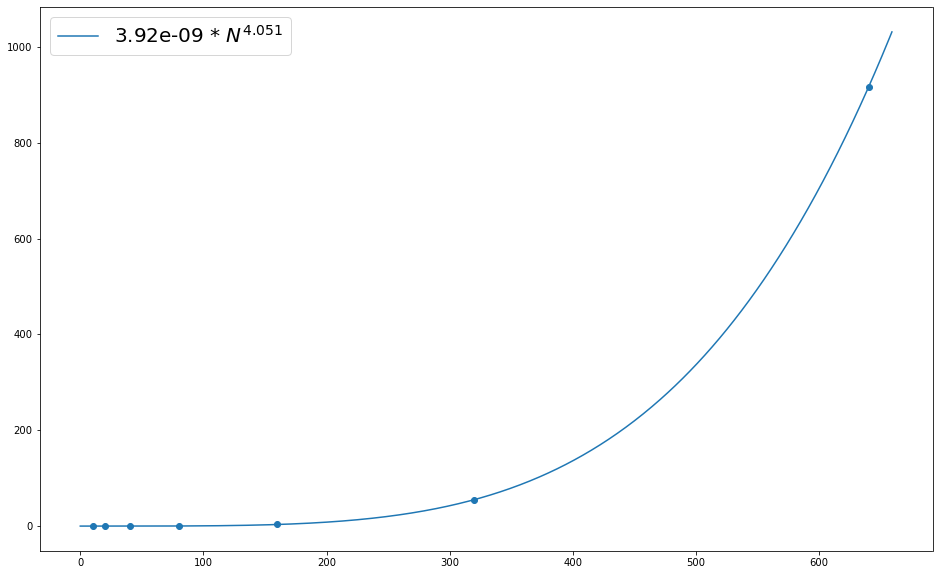

In [69]:
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(ns_3t_wob2, mean_total_lp_3t_wob2)
popt_poly, pcov_poly = curve_fit(f_poly, ns_3t_wob2, mean_total_lp_3t_wob2, maxfev=50000, p0=[0,1])#, bounds=([-500, 0, -50], [500, 10, 50]))

ax.plot(np.arange(660), f_poly(np.arange(660), *popt_poly), label=f"{popt_poly[0]:.3} * $N^{{{popt_poly[1]:.3f}}}$")
print(popt_polyl)
ax.legend(fontsize=20)

Antwort: immer noch komisch

# Schauen, wie der Rest im Loop skaliert und ob Rest + Opt gleich loop Zeit ist

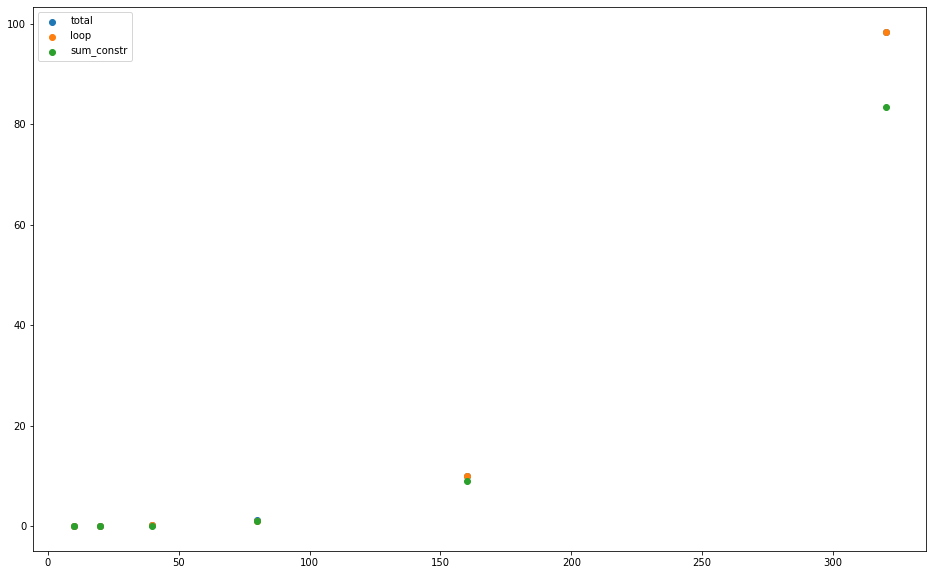

In [70]:
# schauen, wie der Rest skaliert
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(ns_3t, mean_total_lp_3t,label='total')
ax.scatter(ns_3t, mean_teil_loop_3t, label='loop')
ax.scatter(ns_3t, mean_sum_constr_3t, label='sum_constr')
# ax.scatter(ns_3t, np.array(mean_sum_opt_3t) + np.array(mean_sum_constr_3t), label='opt+add_constr')
ax.legend()
# ax.set_xlim([-2,100])
# ax.set_ylim([-0.2,2])

In [ ]:
print(np.array(mean_total_lp_3t_wob2)/np.array(mean_total_lp_3t))

Zusammenfassend kann man sagen: je groesser das Problem wird, desto groesser wird der Anteil des While loops an der Gesamtlaufzeit (hinten raus gegen 1). Fuer den Algorithmus mit break: Den groesseren Anteil an der Loopzeit hat der Teil, wo das neue constraint gebaut wird. Wie ist das jetzt ohne das break statement? 

In [63]:
print(np.array(mean_sum_constr_3t_wob)/np.array(mean_total_lp_3t_wob))

[[0.12452323 0.36201967 0.68429468 0.86005321 0.91528513 0.89245   ]]


In [59]:
print(np.array(mean_sum_constr_3t_wob2)/np.array(mean_total_lp_3t_wob2))

[[0.11770478 0.35800758 0.67750108 0.85624338 0.90648694 0.85908707]]


# Analyse mit 640

[6.69905943e-10 4.36855109e+00 5.13346446e-02]


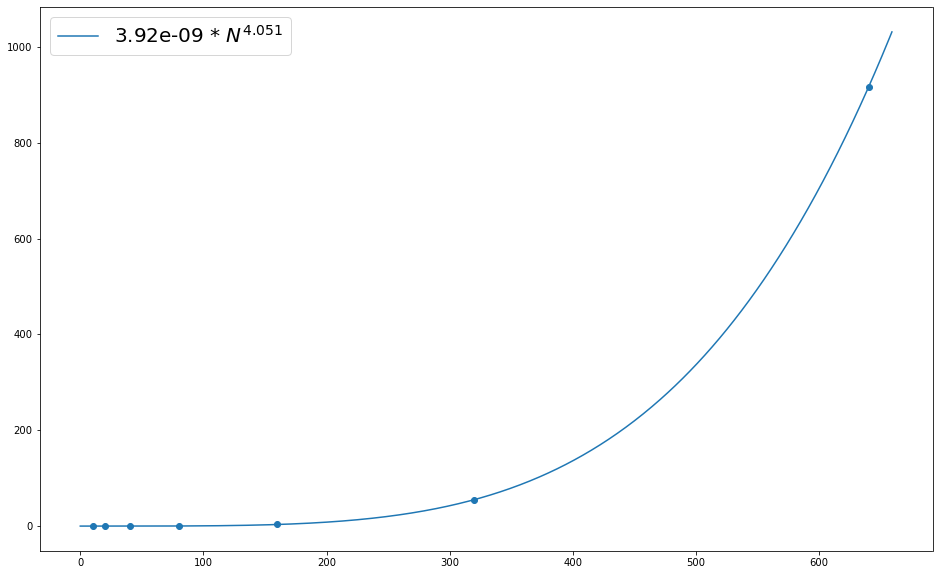

In [71]:
# gesamtlaufzeit
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(ns_3t_wob2, mean_total_lp_3t_wob2)
popt_poly, pcov_poly = curve_fit(f_poly, ns_3t_wob2, mean_total_lp_3t_wob2, maxfev=50000, p0=[0,1])#, bounds=([-500, 0, -50], [500, 10, 50]))

ax.plot(np.arange(660), f_poly(np.arange(660), *popt_poly), label=f"{popt_poly[0]:.3} * $N^{{{popt_poly[1]:.3f}}}$")
print(popt_polyl)
ax.legend(fontsize=20)

Die Gesamtlaufzeit skaliert immer noch komisch

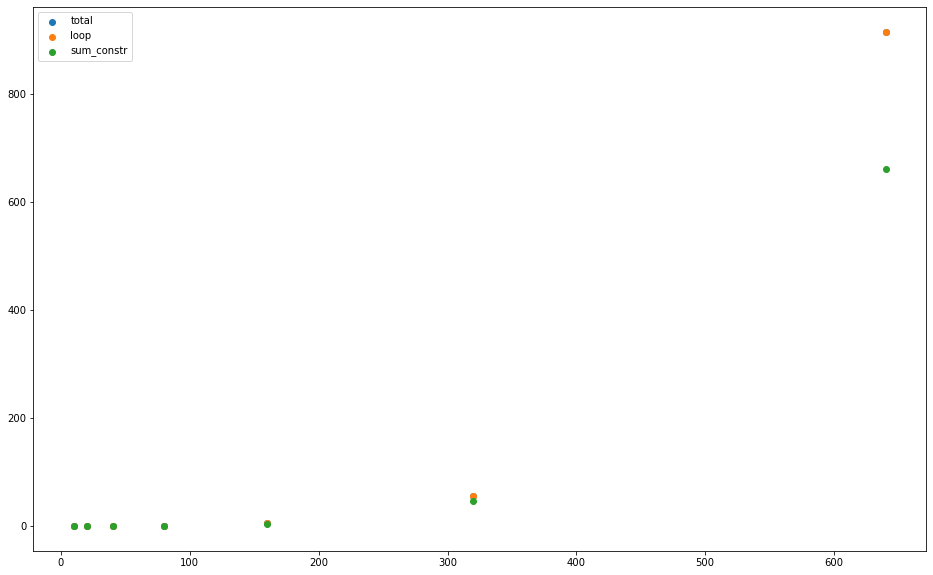

In [76]:
# wie entwickelt sich der Anteil an der Gesamtlaufzeit
# schauen, wie der Teil skaliert in dem die neuen constraints hinzugefügt werden
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(ns_3t_wob2, mean_total_lp_3t_wob2,label='total')
ax.scatter(ns_3t_wob2, mean_teil_loop_3t_wob2, label='loop')
ax.scatter(ns_3t_wob2, mean_sum_constr_3t_wob2, label='sum_constr')
ax.legend()
# ax.set_xlim([-2,100])
# ax.set_ylim([-0.2,2])

In [86]:
np.array(mean_sum_constr_3t_wob2)/np.array(mean_total_lp_3t_wob2)

array([[0.11770478, 0.35800758, 0.67750108, 0.85624338, 0.90648694,
        0.85908707, 0.72212592]])

[[0.11770478 0.35800758 0.67750108 0.85624338 0.90648694 0.85908707
  0.72212592]]
[0.09717035 0.13849104 0.14027554 0.09852389 0.0866668  0.13938102
 0.27714088]


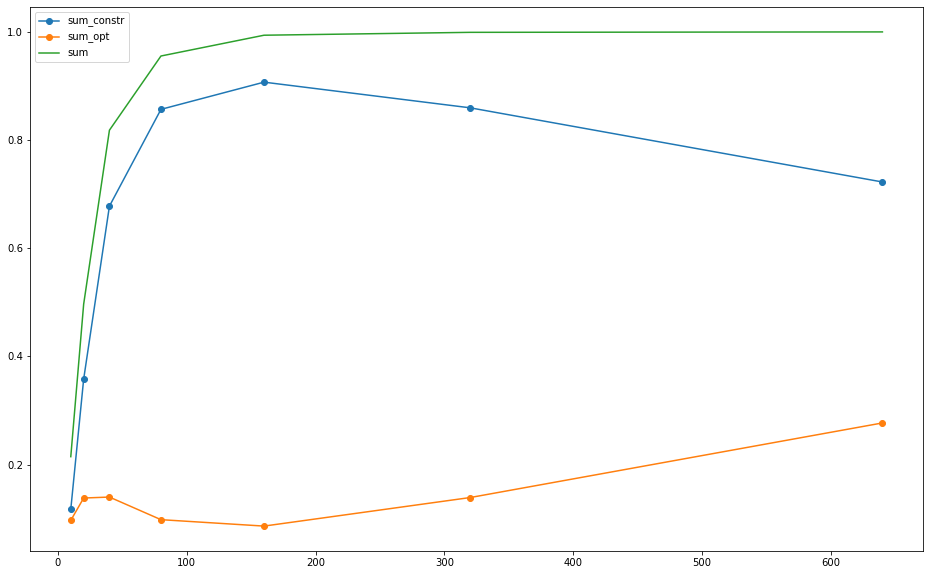

In [89]:
# Anteil des Constraintbaus an Gesamtlaufzeit
print(np.array(mean_sum_constr_3t_wob2)/np.array(mean_total_lp_3t_wob2))
# Anteil der Gurobioptimierungen an Gesamtlaufzeit
print(np.array(mean_sum_opt_3t_wob2)/np.array(mean_total_lp_3t_wob2))

anteil_constr = (np.array(mean_sum_constr_3t_wob2)/np.array(mean_total_lp_3t_wob2)).flatten()
anteil_opt = (np.array(mean_sum_opt_3t_wob2)/np.array(mean_total_lp_3t_wob2)).flatten()
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(np.array(ns_3t_wob2), anteil_constr, 'o-', label='sum_constr')
ax.plot(np.array(ns_3t_wob2), anteil_opt, 'o-', label='sum_opt')
ax.plot(ns_3t_wob2, anteil_constr+anteil_opt, label='sum')
ax.legend()